In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\pc889\Downloads\datasets_727551_1263738_heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [5]:
print("shape:{} and size:{} of the data".format(df.shape , df.size))

shape:(299, 13) and size:3887 of the data


In [6]:
# Checking Mean, Standard dev, Max, Min
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
# Checking header name
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
# Checking the missing values for every columns in dataset
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

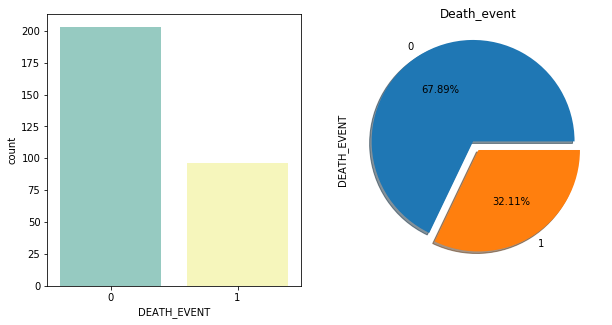

In [10]:
# Visualize the target feature
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data = df , x= "DEATH_EVENT" ,palette = "Set3" ,ax=ax[0])
plt.title("Death_event")
df.DEATH_EVENT.value_counts().plot.pie(explode =[0.1,0] ,autopct = "%0.2f%%" ,shadow = True ,ax = ax[1])
plt.show()

In [11]:
# Univarient analyst and detect an outlier
def univarient(data , feature):
    plt.figure(figsize = (10,10))
    sns.distplot(data[feature])
    plt.show()

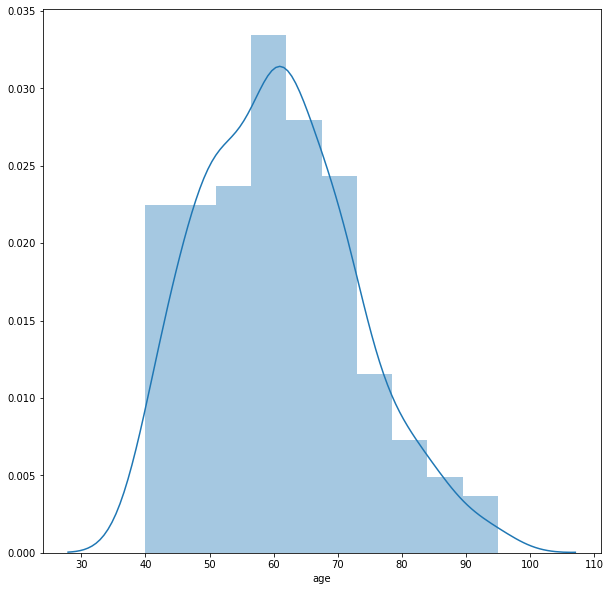

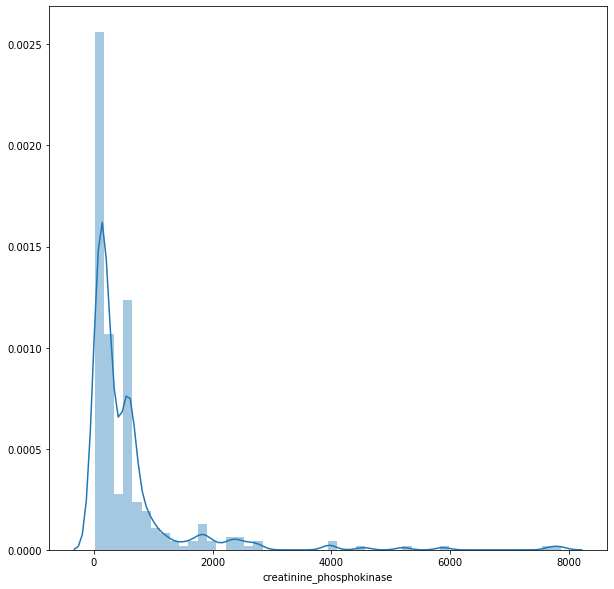

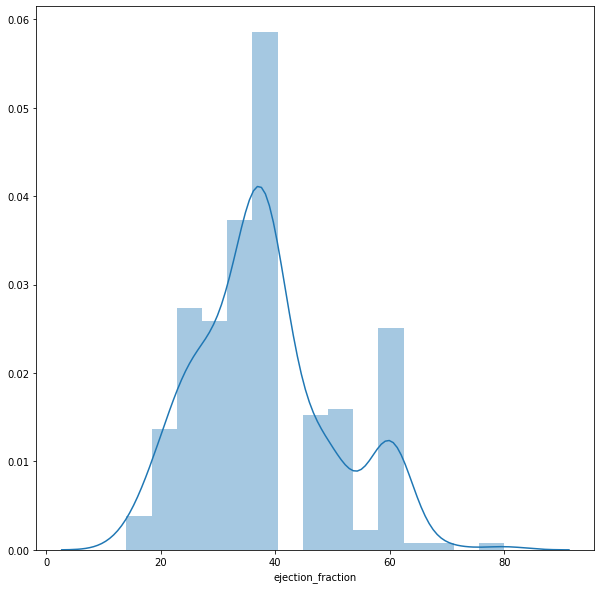

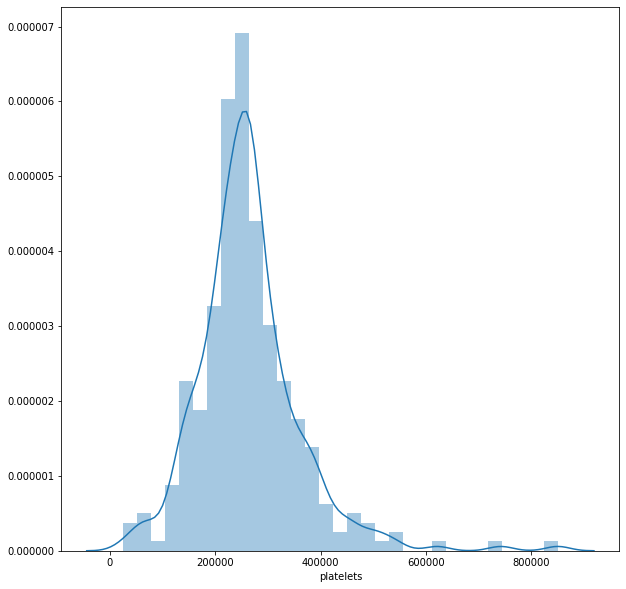

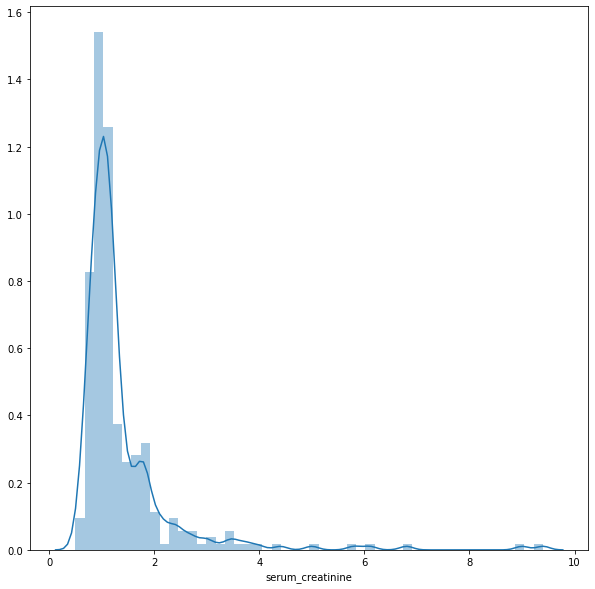

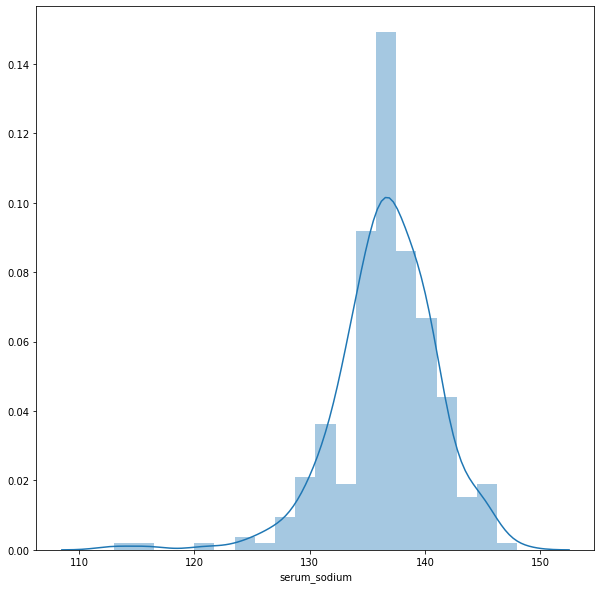

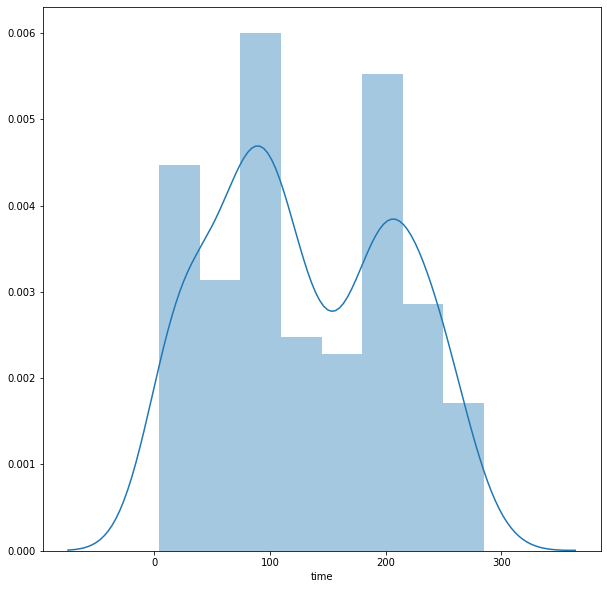

In [12]:
feature = ["age" , "creatinine_phosphokinase" ,"ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for var in feature:
    univarient(df,var)

In [13]:
def outlier(data ,feature):
    plt.figure(figsize = (10,10))
    sns.boxplot(data[feature])
    plt.show()

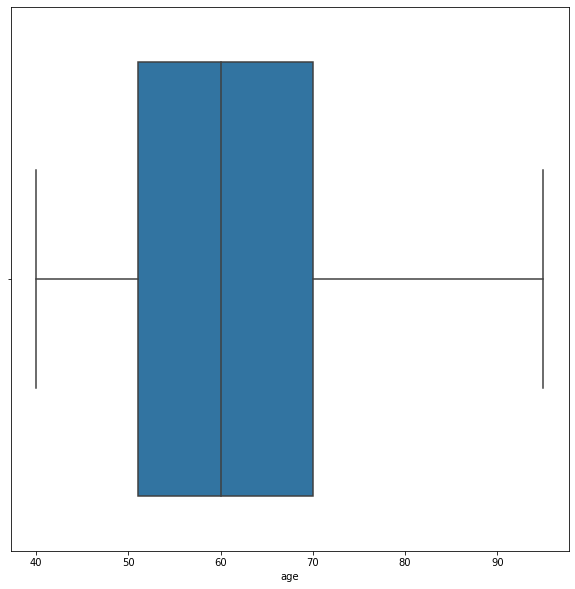

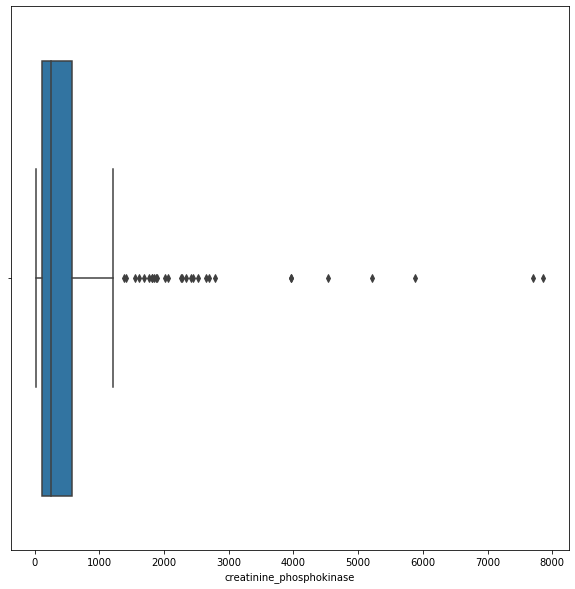

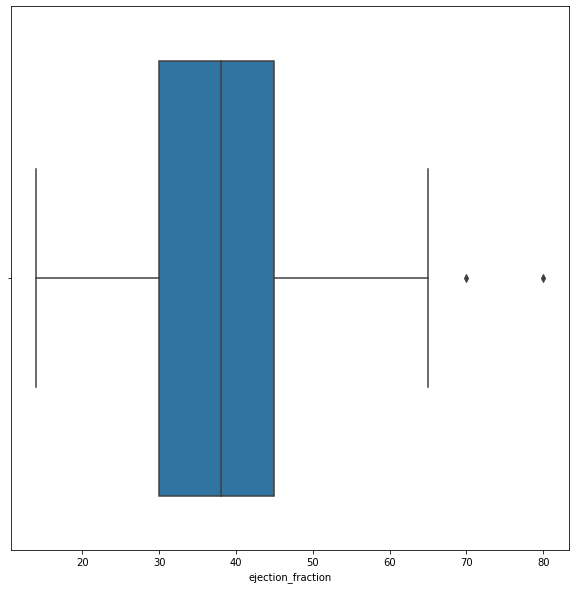

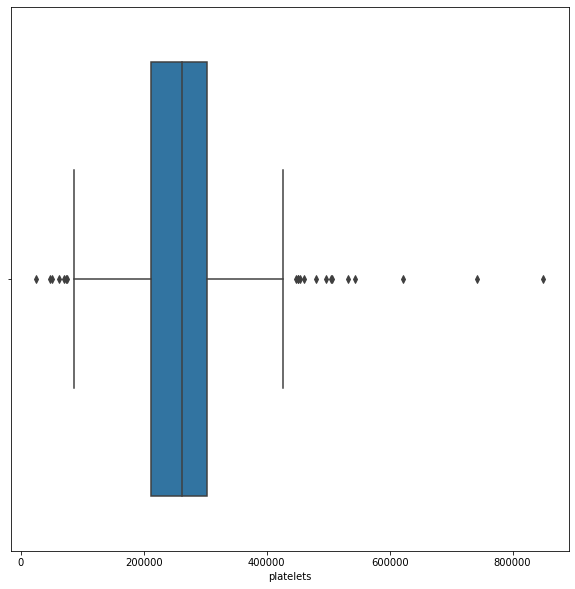

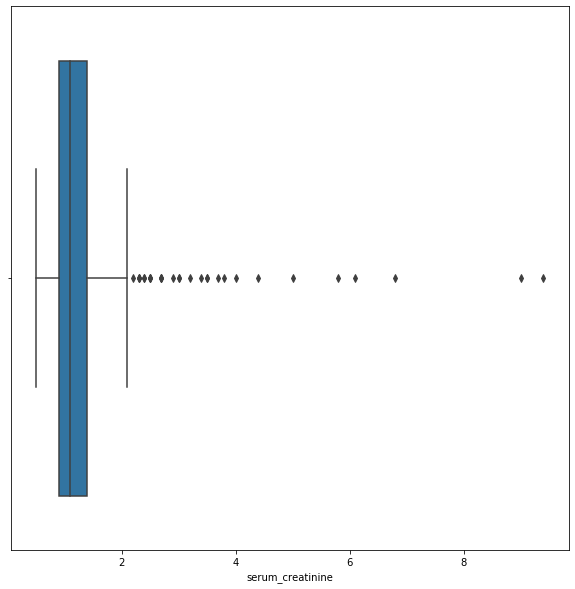

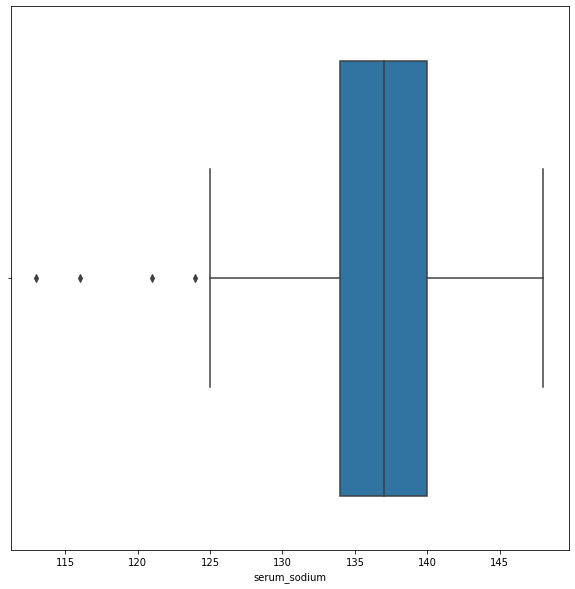

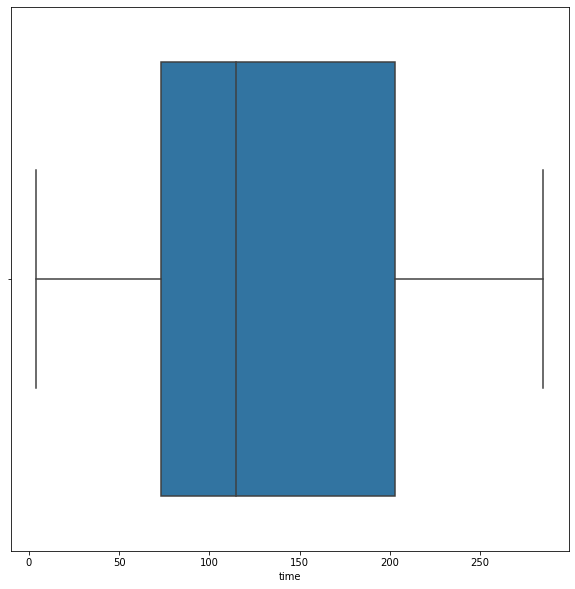

In [14]:
feature = ["age" , "creatinine_phosphokinase" ,"ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for var in feature:
    outlier(df,var)

In [15]:
# Categorical visualization
def univarient_cat(data ,feature):
    plt.figure(figsize = (10,10))
    sns.countplot(x = feature ,hue ="DEATH_EVENT" , data = data , palette = "rainbow" )
    plt.show()

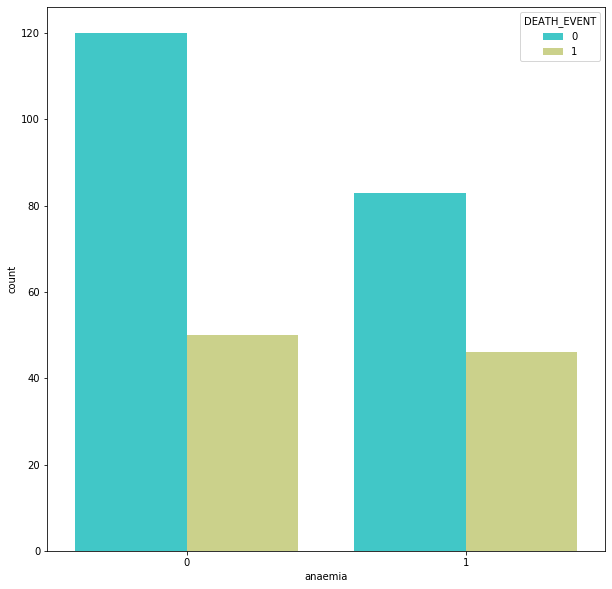

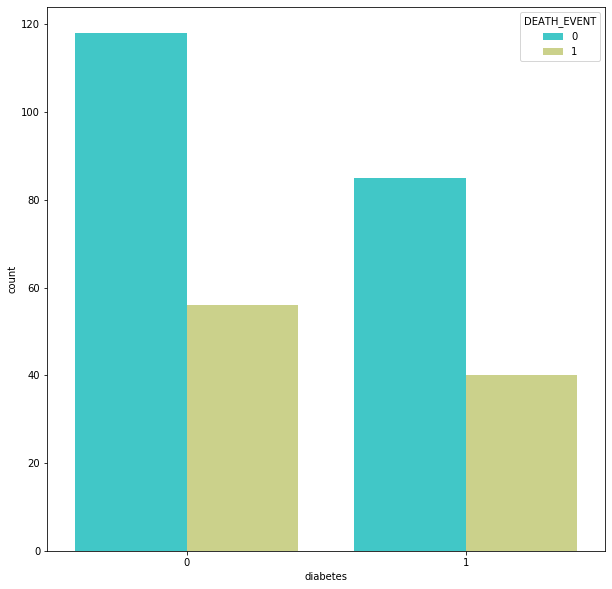

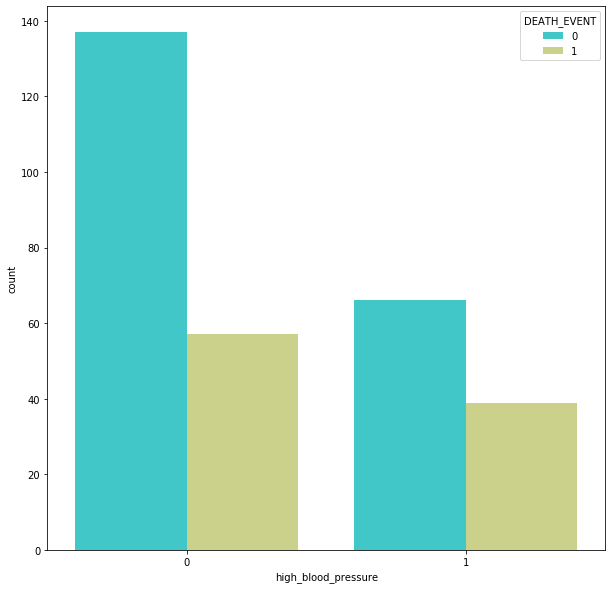

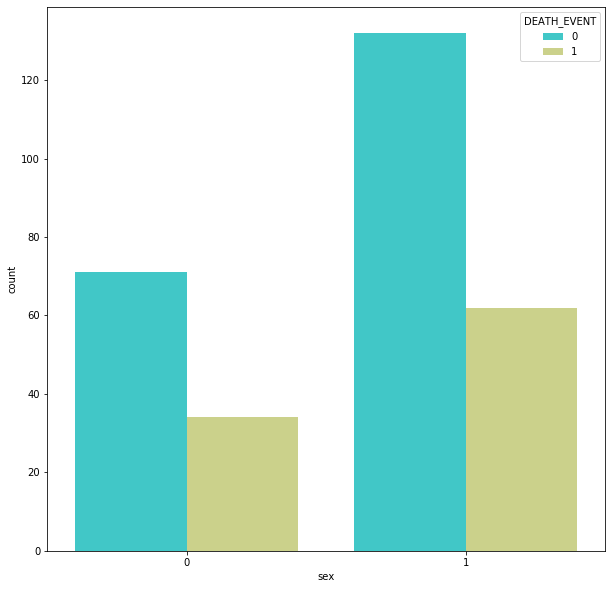

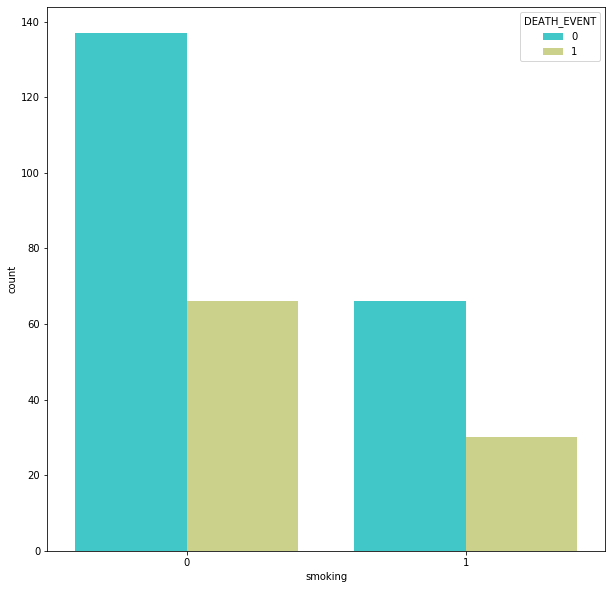

In [16]:
feature_b = ["anaemia"  ,"diabetes","high_blood_pressure","sex","smoking"]
for var in feature_b:
    univarient_cat(df ,var)

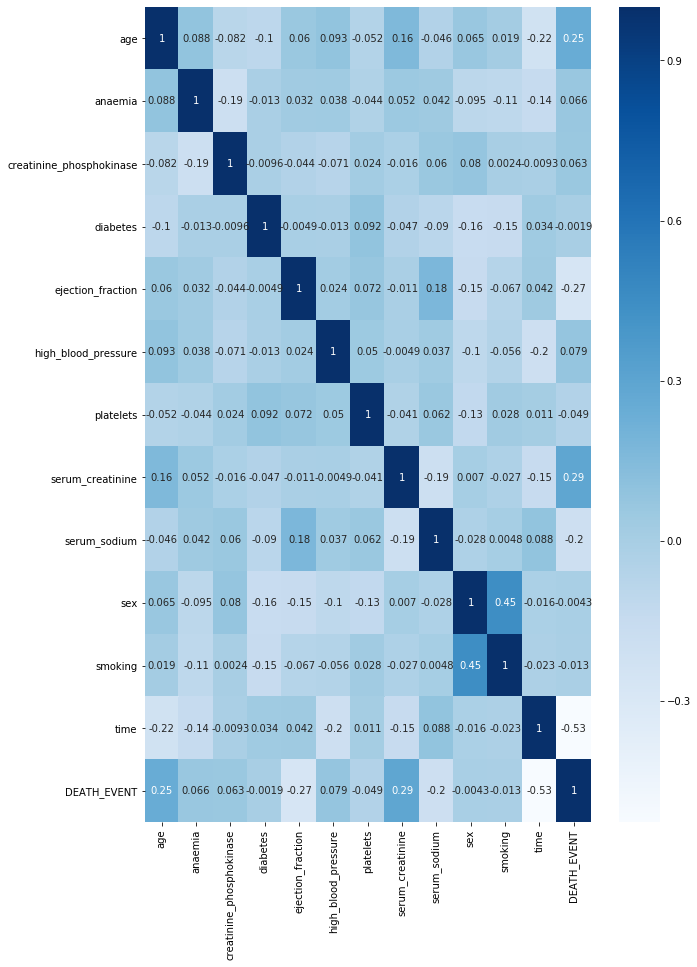

In [17]:
# Visualize corr. for each variables
plt.figure(figsize=(10,15))
sns.heatmap(df.corr() , annot = True ,cmap = "Blues" )
plt.show()

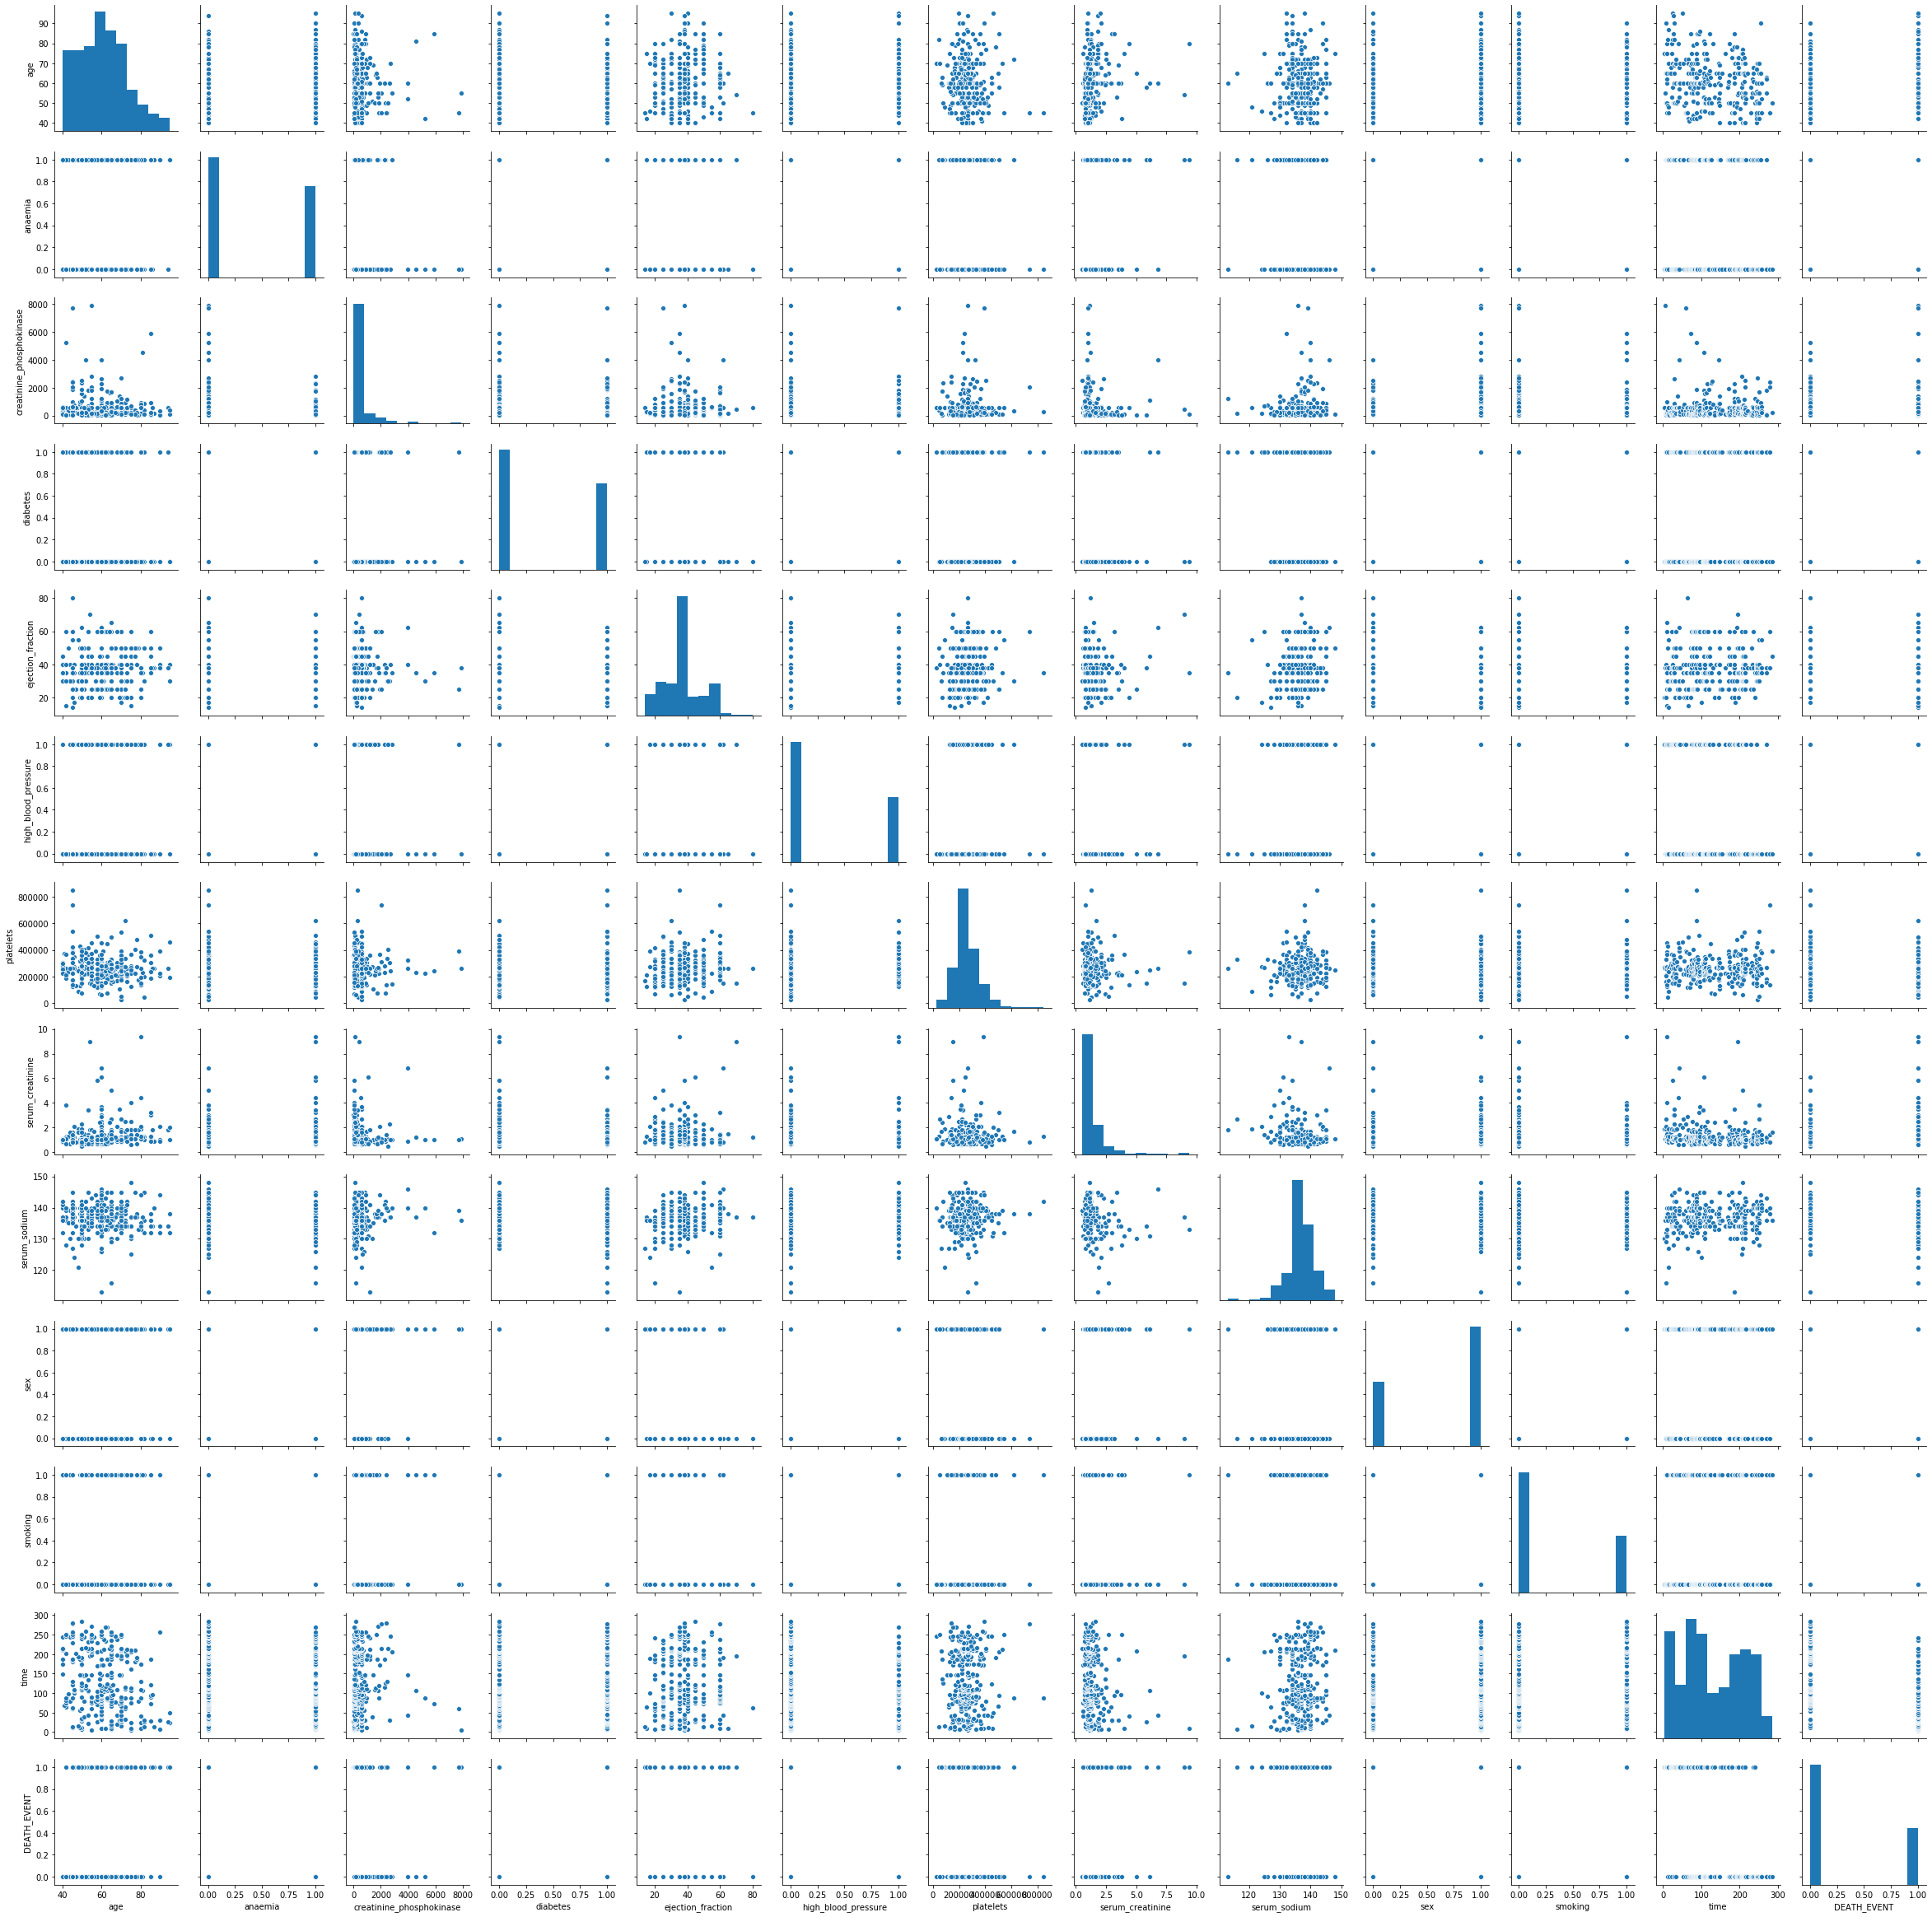

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
#outlier calculation for Extreme and Nominal
def IQR_CAL(data , feature):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    E_upper = data[feature].quantile(0.75) + (3 * IQR)
    E_lower = data[feature].quantile (0.25)- (3 * IQR)
    N_upper = data[feature].quantile(0.75) + (1.5 * IQR) # apply Nominal outlier
    N_lower = data[feature].quantile(0.25) + (1.5 * IQR)
    print("Inter Quantile Range  {}:{}".format(feature,IQR))
    print("Extreme outlier for Upper Boundary  {}:{}".format(feature,E_upper))
    print("Extreme outlier for Lower Boundary  {}:{}".format(feature,E_lower))
    print("Nominal outlier for Upper Boundary  {}:{}".format(feature,N_upper))
    print("Nominal outlier for Lower Boundary  {}:{}".format(feature,N_lower))

In [20]:
outlier_f = [ "creatinine_phosphokinase" ,"ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for var in outlier_f:
    IQR_CAL(df,var)
# In the above code we will calculate the outlier using IQR with Nominal and Extreme Outlier
# Extreme outliers are any data values which lie more than 3.0 times the interquartile range below the first quartile or above the third quartile
# Nominal outliers are any data values which lie more than 1.5 times the interquartile range below the first quartile or above the third quartile

Inter Quantile Range  creatinine_phosphokinase:465.5
Extreme outlier for Upper Boundary  creatinine_phosphokinase:1978.5
Extreme outlier for Lower Boundary  creatinine_phosphokinase:-1280.0
Nominal outlier for Upper Boundary  creatinine_phosphokinase:1280.25
Nominal outlier for Lower Boundary  creatinine_phosphokinase:814.75
Inter Quantile Range  ejection_fraction:15.0
Extreme outlier for Upper Boundary  ejection_fraction:90.0
Extreme outlier for Lower Boundary  ejection_fraction:-15.0
Nominal outlier for Upper Boundary  ejection_fraction:67.5
Nominal outlier for Lower Boundary  ejection_fraction:52.5
Inter Quantile Range  platelets:91000.0
Extreme outlier for Upper Boundary  platelets:576500.0
Extreme outlier for Lower Boundary  platelets:-60500.0
Nominal outlier for Upper Boundary  platelets:440000.0
Nominal outlier for Lower Boundary  platelets:349000.0
Inter Quantile Range  serum_creatinine:0.4999999999999999
Extreme outlier for Upper Boundary  serum_creatinine:2.8999999999999995
E

In [23]:
#outlier removal
df.loc[df["serum_sodium"] < 125 ,  "serum_sodium" ] = 125.0
df.loc[df["serum_creatinine"] > 2.14 ,"serum_creatinine" ] = 2.14

In [24]:
df.loc[df["platelets"] > 440000 , "platelets"] =440000  #nominal outlier
df.loc[df["ejection_fraction"] > 67.5 , "ejection_fraction"] =  67.5   #nominal outlier
df.loc[df["creatinine_phosphokinase"] > 1280.25 , "creatinine_phosphokinase"] = 1280.25 #nominal outlier

In [25]:
# After removed outlier
def outlier_removal_f(data,var):
    plt.figure(figsize = (10,10))
    sns.distplot(data[var],color="y")
    plt.title(var)
    plt.show()

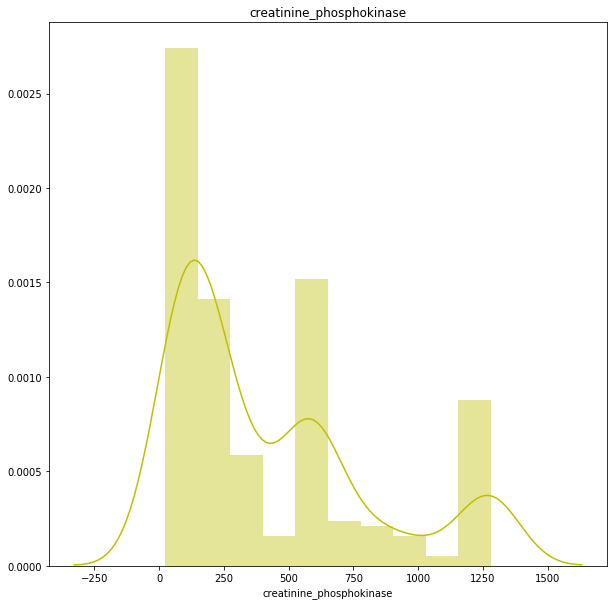

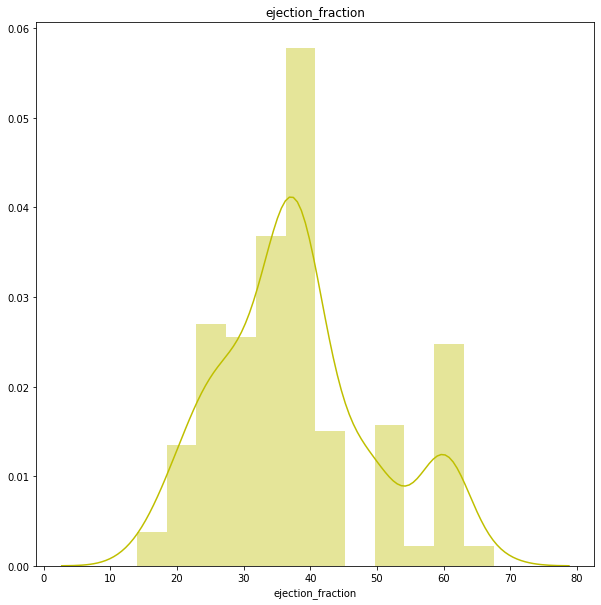

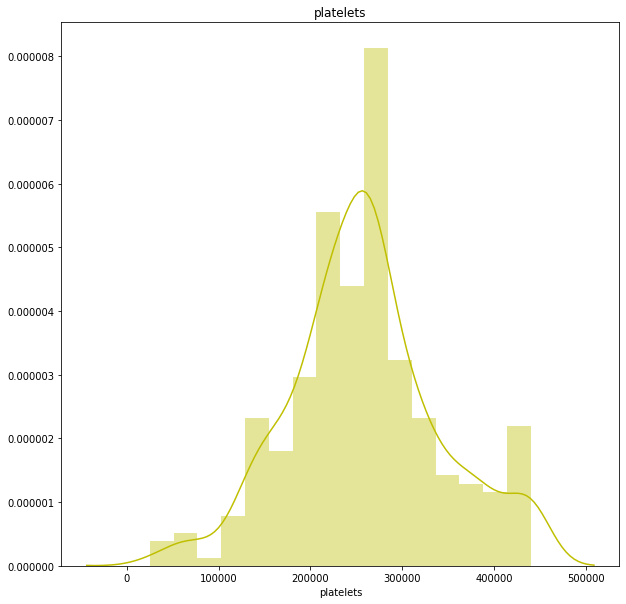

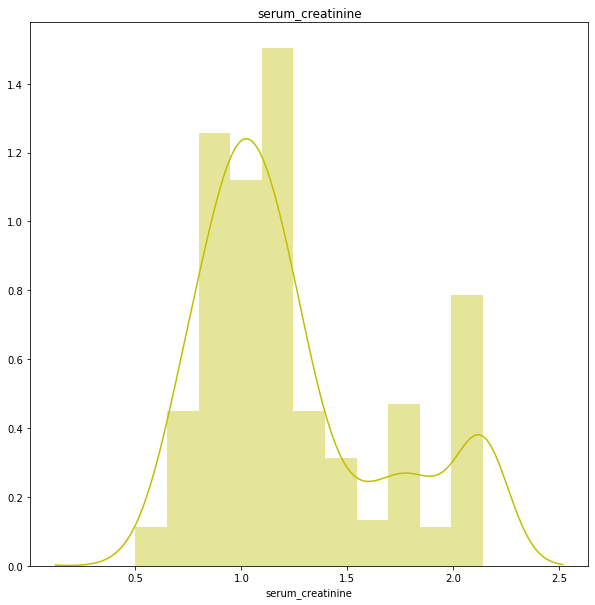

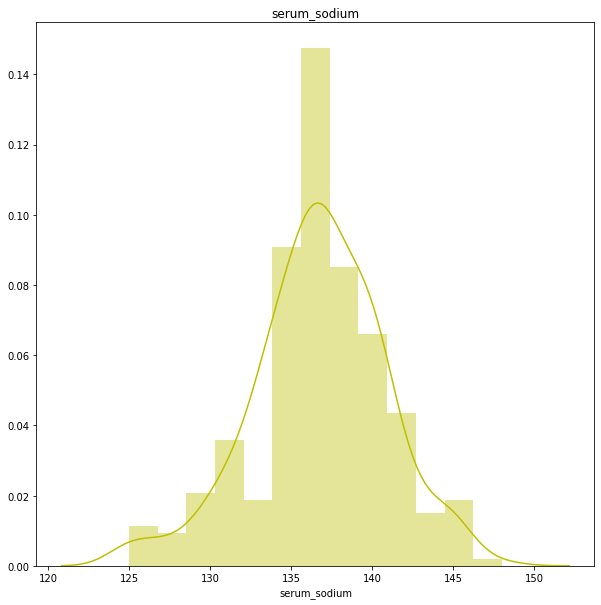

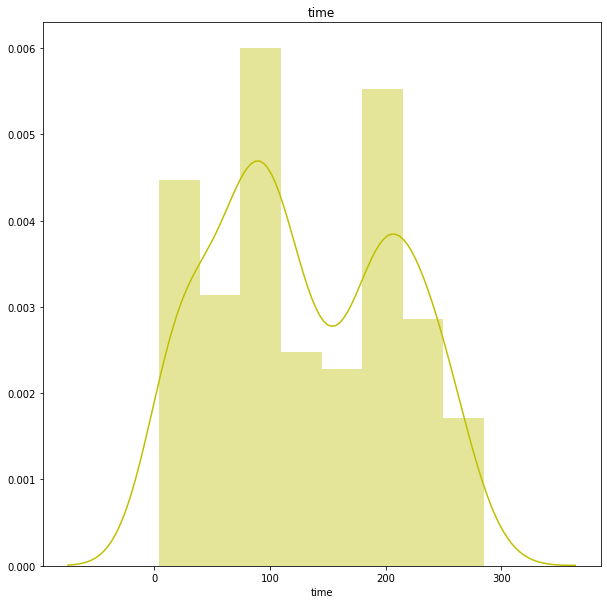

In [26]:
outlier_f = [ "creatinine_phosphokinase" ,"ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for var in outlier_f:
    outlier_removal_f(df,var)

In [27]:
# X, y selection
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report, precision_score,accuracy_score

In [29]:
# Train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
print("shape of x_train:{} and x_test:{}".format(x_train.shape,x_test.shape))
print("shape of y_train:{} and y_test:{}".format(y_train.shape,y_test.shape))

shape of x_train:(239, 12) and x_test:(60, 12)
shape of y_train:(239,) and y_test:(60,)


In [30]:
# Apply standardization
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[[36  1]
 [13 10]]
accuracy Score for Logistic Regression Before appling Standardisation:76.66666666666667


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


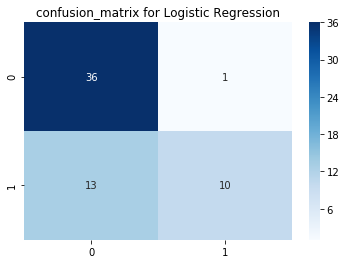

In [31]:
# Logistic Regression modeling
lr = LogisticRegression(penalty = "l2" , fit_intercept=True,verbose = 2 ,n_jobs = -1)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
con = confusion_matrix(y_test,pred)
print(con)
plt.title("confusion_matrix for Logistic Regression")
sns.heatmap(con , annot = True ,cmap = "Blues")
print("accuracy Score for Logistic Regression Before appling Standardisation:{}".format(accuracy_score(y_test,pred) * 100))

[[36  1]
 [10 13]]
accuracy Score for Logistic Regression after appling Standardisation:81.66666666666667


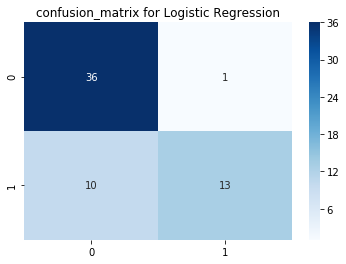

In [32]:
# Apply Standardize 
lr = LogisticRegression(penalty = "l2" , fit_intercept=True)
lr.fit(x_train_std,y_train)
pred = lr.predict(x_test_std)
con = confusion_matrix(y_test,pred)
print(con)
plt.title("confusion_matrix for Logistic Regression")
sns.heatmap(con , annot = True ,cmap = "Blues")
print("accuracy Score for Logistic Regression after appling Standardisation:{}".format(accuracy_score(y_test,pred) * 100))

# RandomForest Modelling

[[35  2]
 [ 9 14]]
accuracy Score for RandomClassifier:81.66666666666667
Classification_report for Random_forest
              precision    recall  f1-score   support

           0       0.80      0.95      0.86        37
           1       0.88      0.61      0.72        23

    accuracy                           0.82        60
   macro avg       0.84      0.78      0.79        60
weighted avg       0.83      0.82      0.81        60



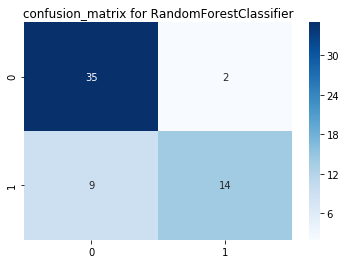

In [33]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
con = confusion_matrix(y_test,pred)
print(con)
plt.title("confusion_matrix for RandomForestClassifier")
sns.heatmap(con , annot = True ,cmap = "Blues")
print("accuracy Score for RandomClassifier:{}".format(accuracy_score(y_test,pred) * 100 ,"%"))
print("Classification_report for Random_forest")
print(classification_report(y_test,pred))

# Gradient Boosting Classifier

[[35  2]
 [ 9 14]]
accuracy Score for GradientBoosting:81.66666666666667
Classification_report for GradientBoosting
              precision    recall  f1-score   support

           0       0.80      0.95      0.86        37
           1       0.88      0.61      0.72        23

    accuracy                           0.82        60
   macro avg       0.84      0.78      0.79        60
weighted avg       0.83      0.82      0.81        60



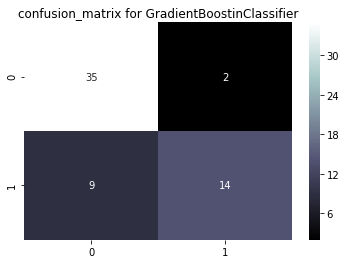

In [34]:
gb = GradientBoostingClassifier(n_estimators = 50 ,max_depth = 10 ,criterion = "mse",random_state = 3)
gb.fit(x_train,y_train)
pred = rf.predict(x_test)
con = confusion_matrix(y_test,pred)
print(con)
plt.title("confusion_matrix for GradientBoostinClassifier")
sns.heatmap(con , annot = True ,cmap = "bone")
print("accuracy Score for GradientBoosting:{}".format(accuracy_score(y_test,pred) * 100 ,"%"))
print("Classification_report for GradientBoosting")
print(classification_report(y_test,pred))

# KNearest Neighbors Classifier

[[37  0]
 [23  0]]
accuracy Score for KneighborsClassifier:61.66666666666667
Classification_report for KneighborsClassifier
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        37
           1       0.00      0.00      0.00        23

    accuracy                           0.62        60
   macro avg       0.31      0.50      0.38        60
weighted avg       0.38      0.62      0.47        60



C:\Users\pc889\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


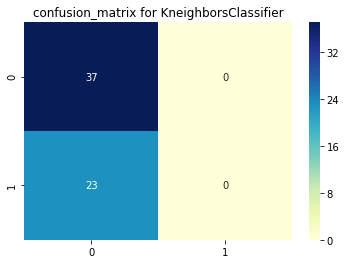

In [35]:
Knn = KNeighborsClassifier(n_neighbors=100, weights='uniform')
Knn.fit(x_train,y_train)
knnpred = Knn.predict(x_test)
con = confusion_matrix(y_test,knnpred)
print(con)
plt.title("confusion_matrix for KneighborsClassifier")
sns.heatmap(con , annot = True ,cmap = "YlGnBu")
print("accuracy Score for KneighborsClassifier:{}".format(accuracy_score(y_test,knnpred) * 100 ))
print("Classification_report for KneighborsClassifier")
print(classification_report(y_test,knnpred))

# Support Vector Classifier

[[37  0]
 [23  0]]
accuracy Score for Support Vector Classifier:61.66666666666667
Classification_report for Support Vector Classifier
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        37
           1       0.00      0.00      0.00        23

    accuracy                           0.62        60
   macro avg       0.31      0.50      0.38        60
weighted avg       0.38      0.62      0.47        60



C:\Users\pc889\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


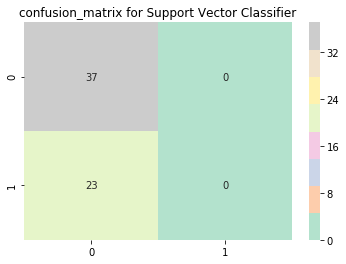

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
con = confusion_matrix(y_test,svcpred)
print(con)
plt.title("confusion_matrix for Support Vector Classifier")
sns.heatmap(con , annot = True ,cmap = "Pastel2")
print("accuracy Score for Support Vector Classifier:{}".format(accuracy_score(y_test,svcpred) * 100 ))
print("Classification_report for Support Vector Classifier")
print(classification_report(y_test,svcpred))

# Support Vector Classifier Standardized

[[35  2]
 [10 13]]
accuracy Score for Support Vector Classifier Standardized:80.0
Classification_report for Support Vector Classifier
              precision    recall  f1-score   support

           0       0.78      0.95      0.85        37
           1       0.87      0.57      0.68        23

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.77        60
weighted avg       0.81      0.80      0.79        60



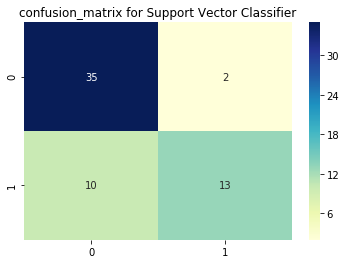

In [37]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_std,y_train)
svcpred = svc.predict(x_test_std)
con = confusion_matrix(y_test,svcpred)
print(con)
plt.title("confusion_matrix for Support Vector Classifier")
sns.heatmap(con , annot = True ,cmap = "YlGnBu")
print("accuracy Score for Support Vector Classifier Standardized:{}".format(accuracy_score(y_test,svcpred) * 100 ))
print("Classification_report for Support Vector Classifier")
print(classification_report(y_test,svcpred))

# Decision Tree Classifier

[[33  4]
 [ 6 17]]
accuracy Score for Decision Tree Classifier:83.33333333333334
Classification_report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        37
           1       0.81      0.74      0.77        23

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



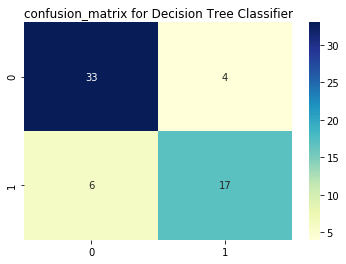

In [38]:
dt = DecisionTreeClassifier(max_depth = 10 ,criterion = "entropy",splitter = "best")
dt.fit(x_train,y_train)
dtpred = dt.predict(x_test)
con = confusion_matrix(y_test,dtpred)
print(con)
plt.title("confusion_matrix for Decision Tree Classifier")
sns.heatmap(con , annot = True ,cmap = "YlGnBu")
print("accuracy Score for Decision Tree Classifier:{}".format(accuracy_score(y_test,dtpred) * 100 ))
print("Classification_report for Decision Tree Classifier")
print(classification_report(y_test,dtpred))

# Cross_val_score Random Forest

In [39]:
rf = RandomForestClassifier()
cr = cross_val_score(rf,x,y,cv = 10)
print("Cross Value Score Random Forest:{}".format(cr.mean()))

Cross Value Score Random Forest:0.7622988505747127


# Manual Hypertuning Random Forest

[[37  0]
 [ 9 14]]
accuracy Score for RandomForest Classifier:85.0
Classification_report for RandomForest Classifier
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        37
           1       1.00      0.61      0.76        23

    accuracy                           0.85        60
   macro avg       0.90      0.80      0.82        60
weighted avg       0.88      0.85      0.84        60



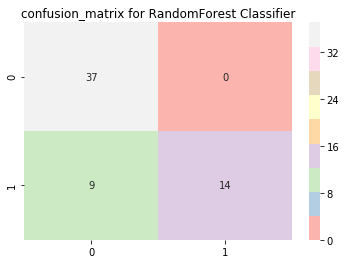

In [40]:
rf=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)
con = confusion_matrix(y_test,rfpred)
print(con)
plt.title("confusion_matrix for RandomForest Classifier")
sns.heatmap(con , annot = True ,cmap = "Pastel1")
print("accuracy Score for RandomForest Classifier:{}".format(accuracy_score(y_test,rfpred) * 100 ))
print("Classification_report for RandomForest Classifier")
print(classification_report(y_test,rfpred))

# Random Forest HuperParem Tuning

In [41]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 2000, num = 1000)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(1, 1000,500)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 

In [42]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [43]:
rf_randomcv.best_params_

{'n_estimators': 682,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 67,
 'criterion': 'entropy'}

In [44]:
rbest = rf_randomcv.best_estimator_
rbest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=67, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=682,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[36  1]
 [ 8 15]]
Accuray Score HyperTuning Random forest:85.0
Classification Report HyperTuning Random forest:              precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.94      0.65      0.77        23

    accuracy                           0.85        60
   macro avg       0.88      0.81      0.83        60
weighted avg       0.86      0.85      0.84        60



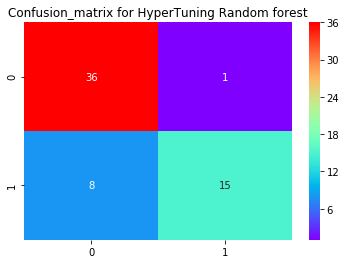

In [45]:
rfpred = rbest.predict(x_test)
confusion = confusion_matrix(y_test , rfpred)
print(confusion)
print("Accuray Score HyperTuning Random forest:{}".format(accuracy_score(y_test,rfpred) * 100))
sns.heatmap(confusion ,annot = True , cmap = "rainbow")
plt.title("Confusion_matrix for HyperTuning Random forest")
print("Classification Report HyperTuning Random forest:{}".format(classification_report(y_test , rfpred)))